In [135]:
import pandas as pd

file_path = "fake_News_Arbic_Content_V3_Moutasm_tamimi.xlsx"
df = pd.read_excel(file_path)

In [78]:
df.columns = ["ID", "Platform", "Date", "Publisher", "Fake_URL", "Fake_Content_Arabic", "Extra_Column"]


In [80]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors="coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.to_period("M")


In [115]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('fake_News_Arbic_Content_V3_Moutasm_tamimi.xlsx')
df['Platform_Name'] = df['B'].astype(str).str.strip().str.lower()

top_platforms = df['Platform_Name'].value_counts().nlargest(5).index.tolist()

df['Platform_Main'] = df['Platform_Name'].apply(lambda x: x if x in top_platforms else 'others')

print(df['Platform_Main'].value_counts())

Platform_Main
facebook     631
others       415
x            281
youtube      235
instagram     58
tiktok        38
Name: count, dtype: int64


In [82]:
# --- Drop invalid/missing dates first ---
df = df.dropna(subset=["Date"])

# --- Extract date parts ---
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.to_period("M")

# --- 1. Missing Values Summary ---
missing_summary = df.isna().sum().reset_index()
missing_summary.columns = ["Column", "Missing_Count"]
missing_summary["Missing_%"] = (missing_summary["Missing_Count"] / len(df) * 100).round(2)

# --- 2. Platform Distribution ---
platform_counts = df["Platform"].value_counts().reset_index()
platform_counts.columns = ["Platform", "Count"]
top15_platforms = platform_counts.head(15)

# --- 3. Publisher Distribution ---
publisher_counts = df["Publisher"].value_counts().reset_index()
publisher_counts.columns = ["Publisher", "Count"]

# --- 4. Yearly Distribution ---
yearly_counts = df["Year"].value_counts().sort_index().reset_index()
yearly_counts.columns = ["Year", "Count"]

# --- 5. Monthly Distribution for 2023–2025 ---
monthly = df[df["Year"] >= 2023].copy()
monthly_counts = monthly["Month"].value_counts().sort_index().reset_index()
monthly_counts.columns = ["Month", "Count"]

# --- 6. URL Availability & Duplicates ---
fake_url_missing = df["Fake_URL"].isna().sum()

# Check if Real_Source_URL exists
if "Real_Source_URL" in df.columns:
    real_url_missing = df["Real_Source_URL"].isna().sum()
else:
    real_url_missing = 0  # Or np.nan, if you prefer

dup_fake_urls = df["Fake_URL"].duplicated().sum()

# --- 7. Summary Output ---
summary_text = {
    "Total Records": len(df),
    "Unique Platforms": df["Platform"].nunique(),
    "Unique Publishers": df["Publisher"].nunique(),
    "Earliest Date": df["Date"].min(),
    "Latest Date": df["Date"].max(),
    "Missing Fake_URL": int(fake_url_missing),
    "Missing Real_Source_URL": int(real_url_missing),
    "Duplicate Fake URLs": int(dup_fake_urls)
}

# --- Print all summary outputs ---
print("=== Missing Values Summary ===")
print(missing_summary)
print("\n=== Top 15 Platforms ===")
print(top15_platforms)
print("\n=== Publisher Distribution ===")
print(publisher_counts)
print("\n=== Yearly Trend ===")
print(yearly_counts)
print("\n=== Monthly Trend (2023–2025) ===")
print(monthly_counts)
print("\n=== Summary Metadata ===")
for k, v in summary_text.items():
    print(f"{k}: {v}")

=== Missing Values Summary ===
                Column  Missing_Count  Missing_%
0                   ID              0       0.00
1             Platform              0       0.00
2                 Date              0       0.00
3            Publisher              0       0.00
4             Fake_URL              0       0.00
5  Fake_Content_Arabic              1       0.16
6         Extra_Column              0       0.00
7                 Year              0       0.00
8                Month              0       0.00

=== Top 15 Platforms ===
         Platform  Count
0        Facebook    245
1               X    111
2         Youtube     85
3       Instagram     18
4          Tiktok     17
5            Jo24      9
6         Archive      7
7           Youm7      6
8          Misbar      5
9           Akeed      5
10        Alaraby      5
11   Timesofindia      4
12  Skynewsarabia      4
13        Chayyek      4
14         Arabic      4

=== Publisher Distribution ===
                 Publ

In [117]:
main_table = df['Platform_Main'].value_counts().loc[top_platforms + ['others']].to_frame('Number of Fake News Articles')
main_table['Percentage (%)'] = (main_table['Number of Fake News Articles'] / main_table['Number of Fake News Articles'].sum() * 100).round(1)
display(main_table)

,Number of Fake News Articles,Percentage (%)
Platform_Main,,
facebook,631,38.1
x,281,16.9
youtube,235,14.2
instagram,58,3.5
tiktok,38,2.3
others,415,25.0


C:\Users\NAGALAXMI\AppData\Local\Temp\ipykernel_7512\3228674423.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top15_platforms, x="Count", y="Platform", palette="viridis")


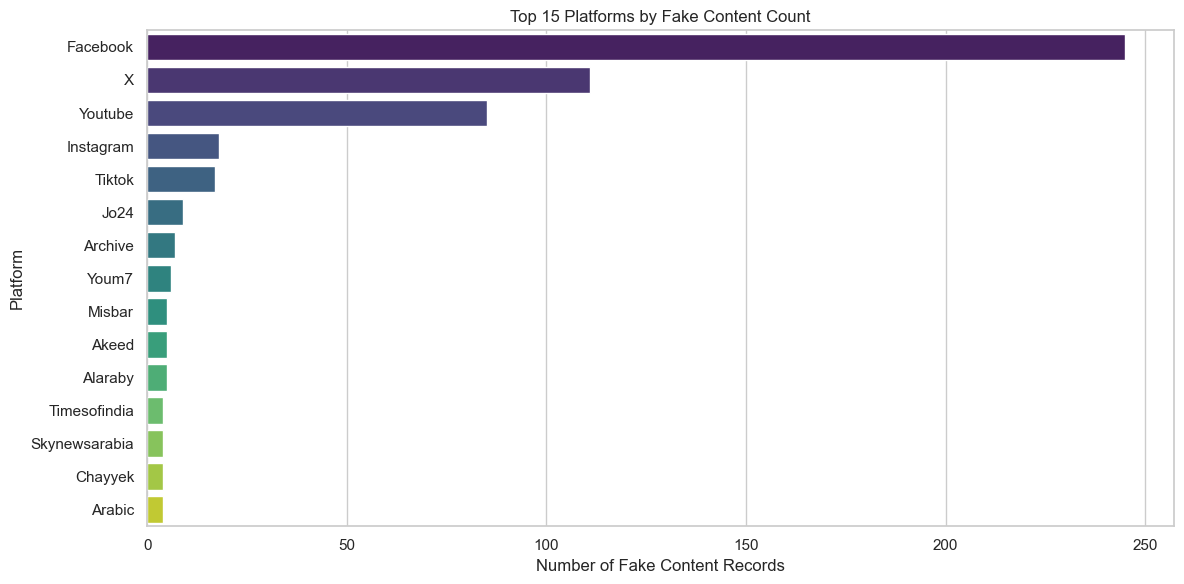

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Clean infinite values to avoid seaborn FutureWarnings
df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# Convert Period to string for plotting (avoids lineplot error)
monthly_counts["Month"] = monthly_counts["Month"].astype(str)

#  Top 15 Platforms
plt.figure(figsize=(12, 6))
sns.barplot(data=top15_platforms, x="Count", y="Platform", palette="viridis")
plt.title("Top 15 Platforms by Fake Content Count")
plt.xlabel("Number of Fake Content Records")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()

C:\Users\NAGALAXMI\AppData\Local\Temp\ipykernel_7512\3193935755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_counts, x="Year", y="Count", palette="cubehelix")


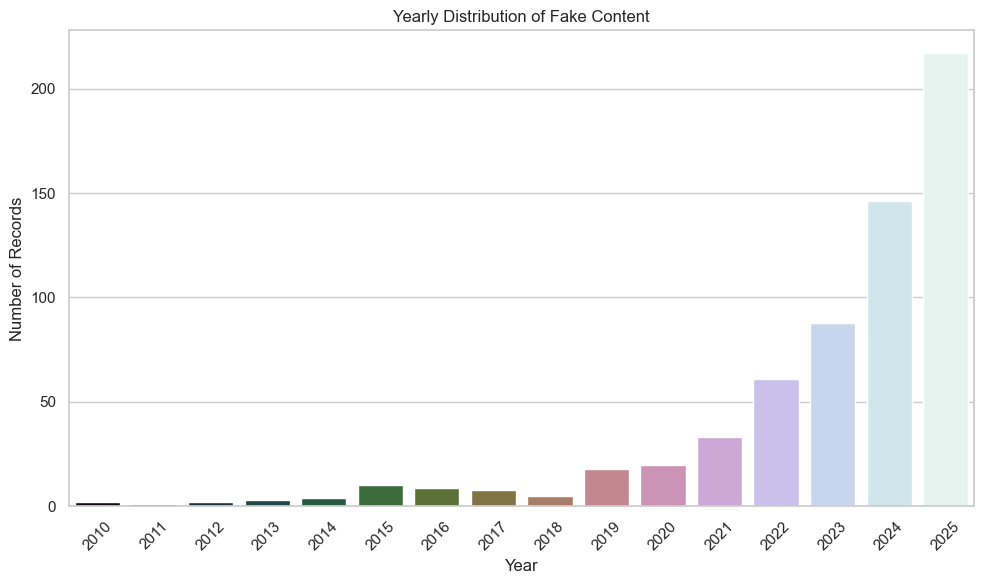

In [98]:
#  Yearly Trend
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_counts, x="Year", y="Count", palette="cubehelix")
plt.title("Yearly Distribution of Fake Content")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


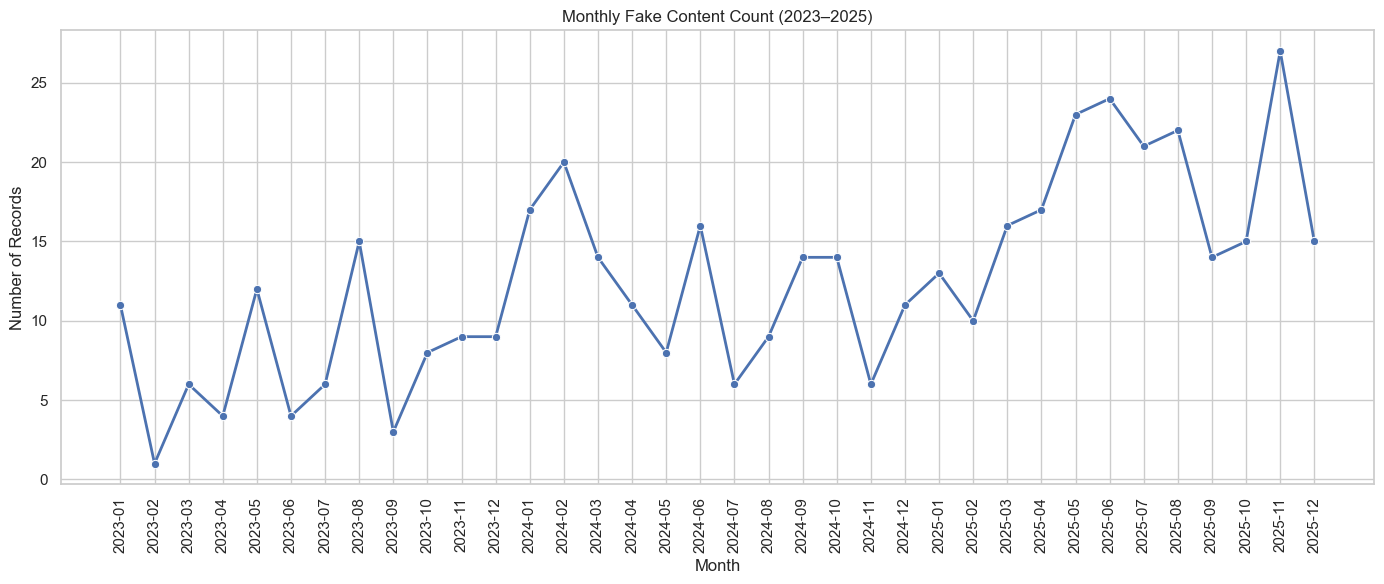

In [96]:
# Monthly Trend (2023–2025)
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_counts, x="Month", y="Count", marker="o", linewidth=2)
plt.title("Monthly Fake Content Count (2023–2025)")
plt.xlabel("Month")
plt.ylabel("Number of Records")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


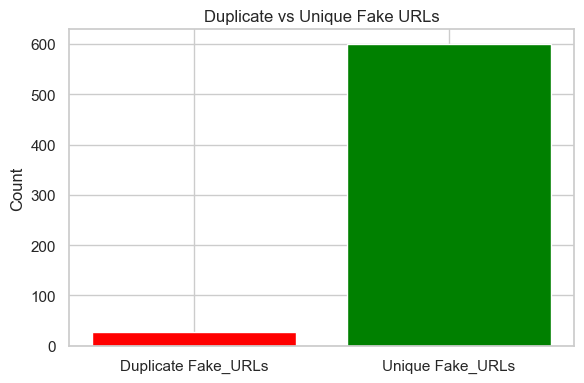

In [94]:
#  Duplicate vs Unique Fake URLs
plt.figure(figsize=(6, 4))
plt.bar(["Duplicate Fake_URLs", "Unique Fake_URLs"], [dup_fake_urls, len(df) - dup_fake_urls], color=["red", "green"])
plt.title("Duplicate vs Unique Fake URLs")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

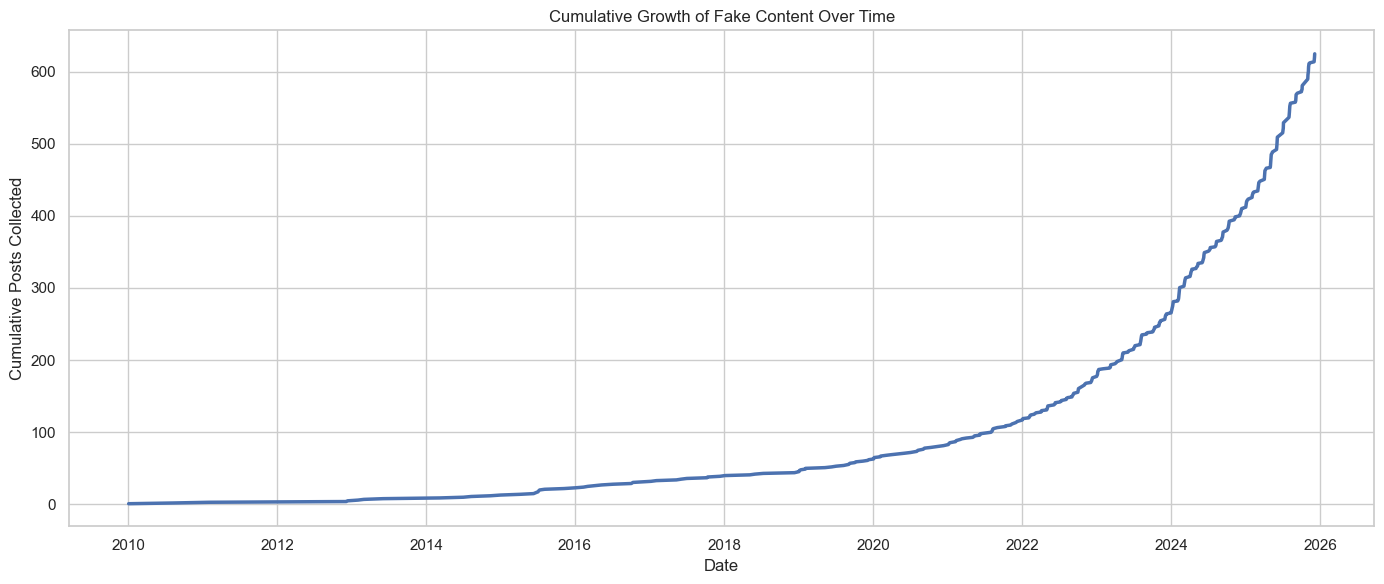

In [106]:
#cumulative growth over time
import numpy as np

df_sorted = df.sort_values("Date").copy()
df_sorted["Cumulative_Count"] = np.arange(1, len(df_sorted) + 1)

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_sorted, x="Date", y="Cumulative_Count", linewidth=2.5)
plt.title("Cumulative Growth of Fake Content Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Posts Collected")
plt.tight_layout()
plt.show()

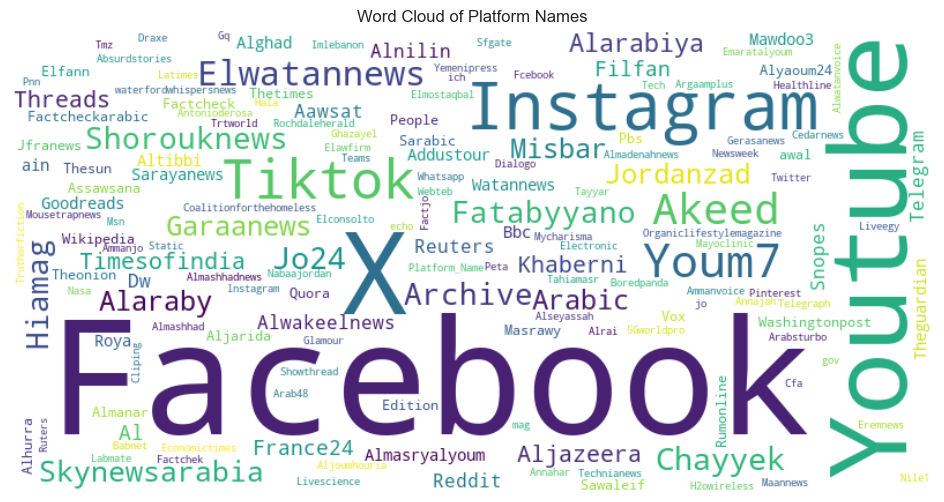

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

file_path = "fake_News_Arbic_Content_V3_Moutasm_tamimi.xlsx"
df = pd.read_excel(file_path)

platform_names = df.iloc[:, 1].astype(str)
df_platform = pd.DataFrame({"Platform_Name": platform_names})

df_platform = df_platform[df_platform["Platform_Name"].notna()]

platform_counts = df_platform["Platform_Name"].value_counts()

text = " ".join(platform_names.values)

wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=400,
    collocations=False
).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Platform Names")
plt.show()